In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#1.1
air_quality = pd.read_csv("global_air_quality.csv")
air_quality

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12 00:00:00
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12 00:00:00
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12 00:00:00
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12 00:00:00
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BLZ,Belize,Year,2010,...,NaN,NaN,3.91,NaN,20.28,9.92 [3.91-20.28],NaN,NaN,EN,2022-08-12 00:00:00
9446,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2010,...,NaN,NaN,7.80,NaN,12.89,9.92 [7.80-12.89],NaN,NaN,EN,2022-08-12 00:00:00
9447,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2010,...,NaN,NaN,6.30,NaN,13.57,9.94 [6.30-13.57],NaN,NaN,EN,2022-08-12 00:00:00
9448,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,USA,United States of America,Year,2010,...,NaN,NaN,9.78,NaN,10.11,9.95 [9.78-10.11],NaN,NaN,EN,2022-08-12 00:00:00


In [10]:
#1.2
air_quality["PM25_Value"] = air_quality["FactValueNumeric"]
air_quality[["FactValueNumeric", "PM25_Value"]]

,FactValueNumeric,PM25_Value
0,10.01,10.01
1,10.02,10.02
2,10.06,10.06
3,10.08,10.08
4,10.09,10.09
...,...,...
9445,9.92,9.92
9446,9.92,9.92
9447,9.94,9.94
9448,9.95,9.95


In [36]:
#1.3
tbl = air_quality[['ParentLocation','PM25_Value']].groupby(["ParentLocation"]).mean().reset_index()
renamed = tbl.rename(columns = {"PM25_Value": "PM25_Avg"})
merged = air_quality.merge(renamed, how = "left")
final = merged[["Location", "ParentLocation", "PM25_Value", "PM25_Avg"]]
print(final)

                                               Location  \
0                                                 Kenya   
1                                   Trinidad and Tobago   
2     United Kingdom of Great Britain and Northern I...   
3                                               Grenada   
4                                                Brazil   
...                                                 ...   
9445                                             Belize   
9446                                Trinidad and Tobago   
9447                                              Kenya   
9448                           United States of America   
9449                                        Afghanistan   

             ParentLocation  PM25_Value   PM25_Avg  
0                    Africa       10.01  29.812282  
1                  Americas       10.02  14.645728  
2                    Europe       10.06  19.244727  
3                  Americas       10.08  14.645728  
4                  America

In [37]:
#1.4
cont_pollution = final.groupby("ParentLocation").max("PM25_Avg")
max_pollution = cont_pollution.sort_values("PM25_Avg", ascending=False).iloc[0]
max_pollution


PM25_Value    97.490000
PM25_Avg      38.403682
Name: Eastern Mediterranean, dtype: float64

In [38]:
#1.5
final.to_csv("pollution.csv")

In [6]:
import seaborn as sns

In [47]:
#2.1
exoplanets = sns.load_dataset("planets")
planets_org = pd.DataFrame(exoplanets)
filtered_planets = planets_org[planets_org["mass"].notna()]
filtered_planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.100,77.40,2006
1,Radial Velocity,1,874.774,2.210,56.95,2008
2,Radial Velocity,1,763.000,2.600,19.84,2011
3,Radial Velocity,1,326.030,19.400,110.62,2007
4,Radial Velocity,1,516.220,10.500,119.47,2009
...,...,...,...,...,...,...
784,Radial Velocity,3,580.000,0.947,135.00,2012
913,Radial Velocity,1,677.800,19.800,NaN,2007
914,Radial Velocity,1,6.958,0.340,NaN,2014
915,Radial Velocity,1,5.118,0.400,NaN,2014


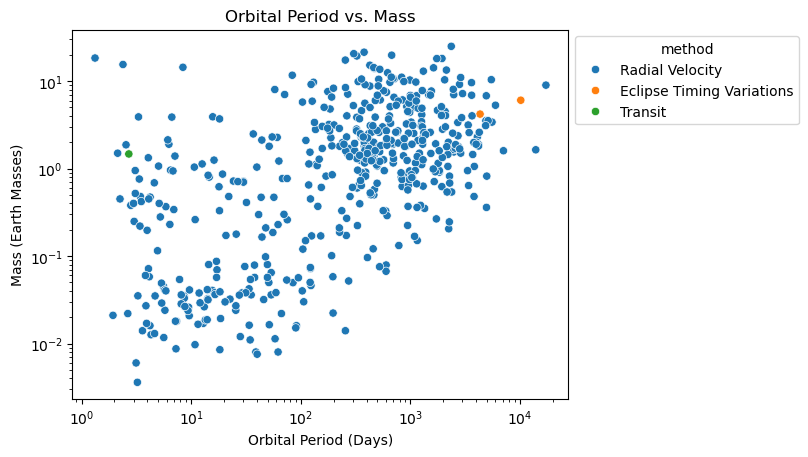

In [48]:
plot = sns.scatterplot(filtered_planets, x= "orbital_period", y = "mass", hue = "method")
sns.move_legend(plot, loc = "upper left", bbox_to_anchor=(1,1))
plot.set(title = "Orbital Period vs. Mass")
plot.set_xlabel("Orbital Period (Days)")
plot.set_ylabel("Mass (Earth Masses)")
plt.xscale("log")
plt.yscale("log")

<Axes: title={'center': 'Exoplanets Discovered by Year with Different Methods'}, xlabel='Year', ylabel='Number of Exoplanets Discovered'>

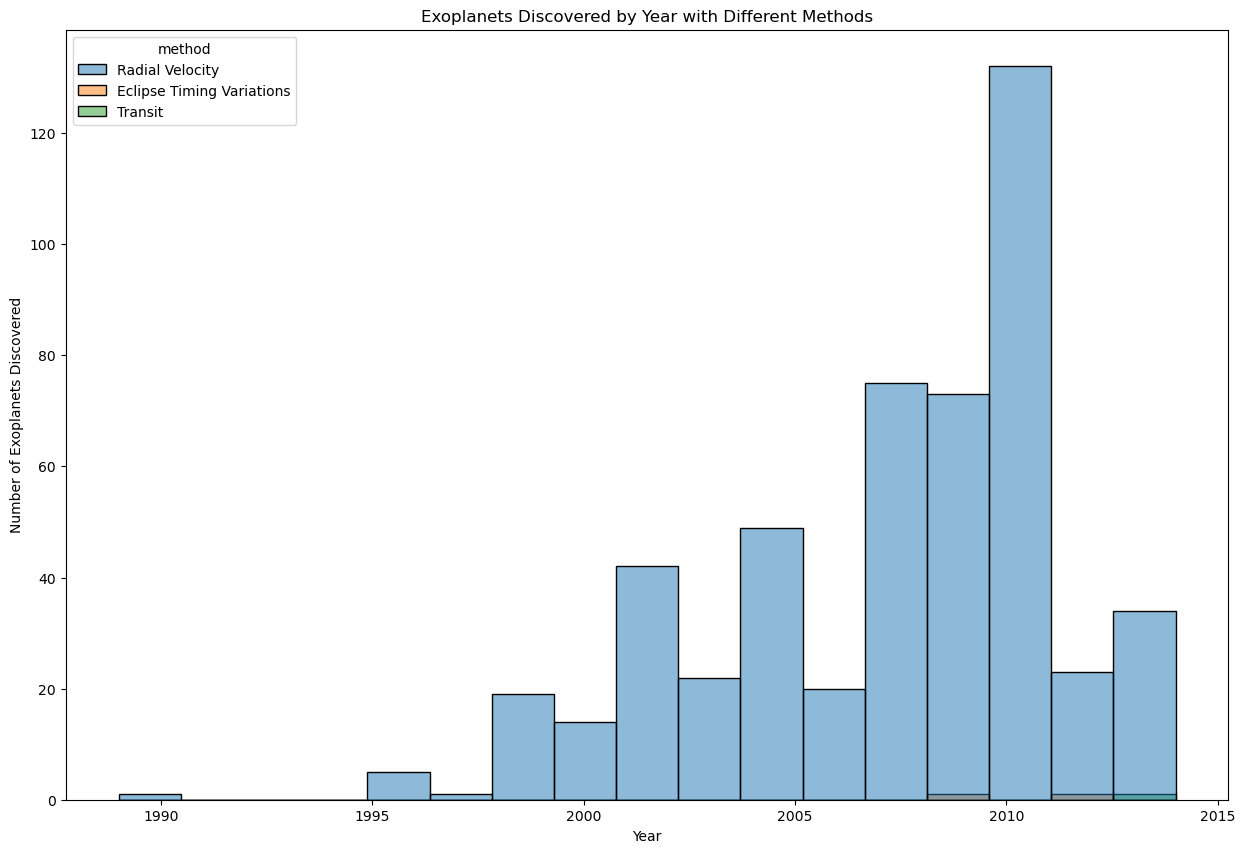

In [49]:
#2.2
plt.figure(figsize = (15, 10))
bar = sns.histplot(filtered_planets, x = "year", hue = "method")
bar.set_xlabel("Year")
bar.set_ylabel("Number of Exoplanets Discovered")
bar.set(title = "Exoplanets Discovered by Year with Different Methods")
bar